<a href="https://colab.research.google.com/github/shubhamksingh1/Pyspark/blob/main/Complete%20PySpark%20%26%20Google%20Colab%20Primer%20For%20Data%20Science/Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pyspark Setup 

In [ ]:
!pip install pyspark==3.0.1     #same as spark version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204.2 MB 38 kB/s 
     |████████████████████████████████| 198 kB 64.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=0943dd59d920a07e456d8076a237968c387be0ac12d64aa4711f6c6b9f11542a
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


In [ ]:
!pip install pyarrow       #pandas dataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download Java

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [ ]:
!update-java-alternatives --list

java-1.11.0-openjdk-amd64      1111       /usr/lib/jvm/java-1.11.0-openjdk-amd64
java-1.8.0-openjdk-amd64       1081       /usr/lib/jvm/java-1.8.0-openjdk-amd64


In [ ]:
!java -version

openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


## Install Apache Spark 3.0.1 with Hadoop 2.7

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

## Unzip

In [ ]:
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

set the environment path. This will enable us to run Pyspark in the Colab environment.

In [ ]:
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.0.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

# Code Starts

## Session Create

## Lecture : Lets Start Sparkling

In [ ]:
import pyspark

In [ ]:
pyspark.__version__

'3.0.1'

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master("local[*]").getOrCreate()  #spark object create spark session and run it locally

In [ ]:
# Test the spark
df = spark.createDataFrame([{"hello":"cat"} for x in range(1000)])

/content/spark-3.0.1-bin-hadoop2.7/python/pyspark/sql/session.py:381: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


In [ ]:
df.show(5,False)

+-----+
|hello|
+-----+
|cat  |
|cat  |
|cat  |
|cat  |
|cat  |
+-----+
only showing top 5 rows



## Lecture : Read CSV into the Spark Framework

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section2/cancer_tumor.csv"

In [ ]:
dataset = spark.read.csv(path,inferSchema=True,header=True)

In [ ]:
dataset.printSchema()

root
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radius_worst: double (nullable = true)


In [ ]:
dataset.show()

+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---------+-----------+------------+--------------+---------+-----

## Lecture : Basic Data Exploration

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section3/ Countries_LandCvr_Elnino.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:



df1.printSchema()

root
 |-- NAME_0: string (nullable = true)
 |-- yearType: string (nullable = true)
 |-- lndcvr_: string (nullable = true)
 |-- n: integer (nullable = true)



In [ ]:

df1.show()

+-------+---------+--------------------+-----+
| NAME_0| yearType|             lndcvr_|    n|
+-------+---------+--------------------+-----+
|Bolivia|   ElNino|Barren or sparsel...|   21|
|Bolivia|   ElNino|   Closed shrublands|   18|
|Bolivia|   ElNino|           Croplands| 1485|
|Bolivia|   ElNino|Deciduous Broadle...|  105|
|Bolivia|   ElNino|Deciduous Needlel...|    1|
|Bolivia|   ElNino|Evergreen Broadle...|11514|
|Bolivia|   ElNino|Evergreen Needlel...|   95|
|Bolivia|   ElNino|          Grasslands| 9428|
|Bolivia|   ElNino|        Mixed forest|  604|
|Bolivia|   ElNino|     Open shrublands|   37|
|Bolivia|   ElNino|            Savannas|24447|
|Bolivia|   ElNino|  Urban and built-up|    9|
|Bolivia|   ElNino|      Woody savannas| 7426|
|Bolivia|NonElNino|Barren or sparsel...|    6|
|Bolivia|NonElNino|   Closed shrublands|   16|
|Bolivia|NonElNino|           Croplands|  467|
|Bolivia|NonElNino|Deciduous Broadle...|   27|
|Bolivia|NonElNino|Deciduous Needlel...|    1|
|Bolivia|NonE

## Lecture : Data Summarisation

In [ ]:
sm = df1.summary()

In [ ]:

## summary statistics or descriptive statistics of dataframe

df1.describe().show()


+-------+---------+---------+--------------------+------------------+
|summary|   NAME_0| yearType|             lndcvr_|                 n|
+-------+---------+---------+--------------------+------------------+
|  count|      153|      153|                 153|               153|
|   mean|     null|     null|                null|2419.4640522875816|
| stddev|     null|     null|                null| 9841.475254480629|
|    min|  Bolivia|   ElNino|Barren or sparsel...|                 1|
|    max|Venezuela|NonElNino|      Woody savannas|             99296|
+-------+---------+---------+--------------------+------------------+



In [ ]:
df1.describe('n').show()

+-------+------------------+
|summary|                 n|
+-------+------------------+
|  count|               153|
|   mean|2419.4640522875816|
| stddev| 9841.475254480629|
|    min|                 1|
|    max|             99296|
+-------+------------------+



In [ ]:
country=df1.select(['NAME_0','n']).show()

+-------+-----+
| NAME_0|    n|
+-------+-----+
|Bolivia|   21|
|Bolivia|   18|
|Bolivia| 1485|
|Bolivia|  105|
|Bolivia|    1|
|Bolivia|11514|
|Bolivia|   95|
|Bolivia| 9428|
|Bolivia|  604|
|Bolivia|   37|
|Bolivia|24447|
|Bolivia|    9|
|Bolivia| 7426|
|Bolivia|    6|
|Bolivia|   16|
|Bolivia|  467|
|Bolivia|   27|
|Bolivia|    1|
|Bolivia| 3507|
|Bolivia|   36|
+-------+-----+
only showing top 20 rows



In [ ]:
yr=df1.select(['yearType','n']).show()

+---------+-----+
| yearType|    n|
+---------+-----+
|   ElNino|   21|
|   ElNino|   18|
|   ElNino| 1485|
|   ElNino|  105|
|   ElNino|    1|
|   ElNino|11514|
|   ElNino|   95|
|   ElNino| 9428|
|   ElNino|  604|
|   ElNino|   37|
|   ElNino|24447|
|   ElNino|    9|
|   ElNino| 7426|
|NonElNino|    6|
|NonElNino|   16|
|NonElNino|  467|
|NonElNino|   27|
|NonElNino|    1|
|NonElNino| 3507|
|NonElNino|   36|
+---------+-----+
only showing top 20 rows



In [ ]:
df1.groupBy('lndcvr_').count().show()

+--------------------+-----+
|             lndcvr_|count|
+--------------------+-----+
|Evergreen Needlel...|   14|
|Deciduous Needlel...|    6|
|      Woody savannas|   13|
|   Closed shrublands|   12|
|        Mixed forest|   13|
|            Savannas|   13|
|           Croplands|   12|
|Deciduous Broadle...|   12|
|     Open shrublands|    8|
|  Urban and built-up|   11|
|Barren or sparsel...|   12|
|Evergreen Broadle...|   14|
|          Grasslands|   13|
+--------------------+-----+



In [ ]:
df1.groupBy('lndcvr_').count().show()

+--------------------+-----+
|             lndcvr_|count|
+--------------------+-----+
|Evergreen Needlel...|   14|
|Deciduous Needlel...|    6|
|      Woody savannas|   13|
|   Closed shrublands|   12|
|        Mixed forest|   13|
|            Savannas|   13|
|           Croplands|   12|
|Deciduous Broadle...|   12|
|     Open shrublands|    8|
|  Urban and built-up|   11|
|Barren or sparsel...|   12|
|Evergreen Broadle...|   14|
|          Grasslands|   13|
+--------------------+-----+



In [ ]:
### total number of fires in each of the landcover categories

In [ ]:
df1.groupBy('lndcvr_').sum().show()

+--------------------+------+
|             lndcvr_|sum(n)|
+--------------------+------+
|Evergreen Needlel...|   691|
|Deciduous Needlel...|     7|
|      Woody savannas| 24391|
|   Closed shrublands|   478|
|        Mixed forest|  2395|
|            Savannas|171599|
|           Croplands| 28836|
|Deciduous Broadle...|   584|
|     Open shrublands|   190|
|  Urban and built-up|    98|
|Barren or sparsel...|   200|
|Evergreen Broadle...|107734|
|          Grasslands| 32975|
+--------------------+------+



In [ ]:
for col in df1.columns:
  if col !='n': # dont iterate on 'n'
    print(f"Aggreation for col")
    df1.groupBy(col).count().orderBy('count',ascending=False).show(truncate=False)

Aggreation for col
+---------+-----+
|NAME_0   |count|
+---------+-----+
|Bolivia  |26   |
|Brazil   |26   |
|Guyana   |24   |
|Venezuela|24   |
|Peru     |22   |
|Colombia |22   |
|Ecuador  |9    |
+---------+-----+

Aggreation for col
+---------+-----+
|yearType |count|
+---------+-----+
|ElNino   |79   |
|NonElNino|74   |
+---------+-----+

Aggreation for col
+----------------------------+-----+
|lndcvr_                     |count|
+----------------------------+-----+
|Evergreen Needleleaf forest |14   |
|Evergreen Broadleaf forest  |14   |
|Savannas                    |13   |
|Woody savannas              |13   |
|Mixed forest                |13   |
|Grasslands                  |13   |
|Croplands                   |12   |
|Closed shrublands           |12   |
|Deciduous Broadleaf forest  |12   |
|Barren or sparsely vegetated|12   |
|Urban and built-up          |11   |
|Open shrublands             |8    |
|Deciduous Needleleaf forest |6    |
+----------------------------+-----+



In [ ]:
for col in df1.columns:
  if col !='n': # dont iterate on 'n'
    print(f"Aggreation for col")
    df1.groupBy(col).sum().orderBy('sum(n)',ascending=False).show(truncate=False)

Aggreation for col
+---------+------+
|NAME_0   |sum(n)|
+---------+------+
|Brazil   |247462|
|Bolivia  |73294 |
|Colombia |22896 |
|Venezuela|11316 |
|Peru     |9794  |
|Guyana   |5349  |
|Ecuador  |67    |
+---------+------+

Aggreation for col
+---------+------+
|yearType |sum(n)|
+---------+------+
|ElNino   |278502|
|NonElNino|91676 |
+---------+------+

Aggreation for col
+----------------------------+------+
|lndcvr_                     |sum(n)|
+----------------------------+------+
|Savannas                    |171599|
|Evergreen Broadleaf forest  |107734|
|Grasslands                  |32975 |
|Croplands                   |28836 |
|Woody savannas              |24391 |
|Mixed forest                |2395  |
|Evergreen Needleleaf forest |691   |
|Deciduous Broadleaf forest  |584   |
|Closed shrublands           |478   |
|Barren or sparsely vegetated|200   |
|Open shrublands             |190   |
|Urban and built-up          |98    |
|Deciduous Needleleaf forest |7     |
+---------

## Lecture:  Data Standardisation

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section5/glassClass.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show(6)

+-------+-----+----+----+-----+----+----+---+----+----+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|Type|
+-------+-----+----+----+-----+----+----+---+----+----+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|   1|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|
+-------+-----+----+----+-----+----+----+---+----+----+
only showing top 6 rows



In [ ]:
df2=df1.drop("Type") ## drop a column .drop

In [ ]:
df2.show()

+-------+-----+----+----+-----+----+----+---+----+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|
+-------+-----+----+----+-----+----+----+---+----+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|
|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|
|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|
|1.51571|12.72|3.46|1.56| 73.2|0.67|8.09|0.0|0.24|
|1.51763| 12.8|3.66|1.27|73.01| 0.6|8.56|0.0| 0.0|
|1.51589|12.88|3.43| 1.4|73.28|0.69|8.05|0.0|0.24|
|1.51748|12.86|3.56|1.27|73.21|0.54|8.38|0.0|0.17|
|1.51763|12.61|3.59|1.31|73.29|0.58| 8.5|0.0| 0.0|
|1.51761|12.81|3.54|1.23|73.24|0.58|8.39|0.0| 0.0|
|1.51784|12.68|3.67|1.16|73.11|

In [ ]:
from pyspark.mllib.stat import Statistics



In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
Pred_corr= ['RI','Na',
'Mg','Al','Si','K','Ca','Ba','Fe'] ### the variables/predictors I need 
### Type--> response variable Y



In [ ]:
vector_col = "Predictors"
assembler = VectorAssembler(inputCols=Pred_corr, 
                            outputCol=vector_col) ##assemble the inputs and outputs


In [ ]:
output = assembler.transform(df2)


In [ ]:
output.show()

+-------+-----+----+----+-----+----+----+---+----+--------------------+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|          Predictors|
+-------+-----+----+----+-----+----+----+---+----+--------------------+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|[1.52101,13.64,4....|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|[1.51761,13.89,3....|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|[1.51618,13.53,3....|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|[1.51766,13.21,3....|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|[1.51742,13.27,3....|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|[1.51596,12.79,3....|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|[1.51743,13.3,3.6...|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|[1.51756,13.15,3....|
|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|[1.51918,14.04,3....|
|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|[1.51755,13.0,3.6...|
|1.51571|12.72|3.46|1.56| 73.2|0.67|8.09|0.0|0.24|[1.51571,12.72

In [ ]:
from pyspark.ml.feature import StandardScaler

In [ ]:
scale=StandardScaler(inputCol="Predictors",outputCol='standardized')

In [ ]:
data_scale=scale.fit(output)

In [ ]:
data_scale_output=data_scale.transform(output)

In [ ]:
data_scale_output.show()

+-------+-----+----+----+-----+----+----+---+----+--------------------+--------------------+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|          Predictors|        standardized|
+-------+-----+----+----+-----+----+----+---+----+--------------------+--------------------+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|[1.52101,13.64,4....|[500.848945006586...|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|[1.51761,13.89,3....|[499.729368926861...|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|[1.51618,13.53,3....|[499.258488399212...|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|[1.51766,13.21,3....|[499.745833280974...|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|[1.51742,13.27,3....|[499.666804381229...|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|[1.51596,12.79,3....|[499.186045241112...|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|[1.51743,13.3,3.6...|[499.670097252052...|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|[1.51756,13.15,3....

In [ ]:

data_scale_output.select(['standardized']).show()

+--------------------+
|        standardized|
+--------------------+
|[500.848945006586...|
|[499.729368926861...|
|[499.258488399212...|
|[499.745833280974...|
|[499.666804381229...|
|[499.186045241112...|
|[499.670097252052...|
|[499.712904572747...|
|[500.246349646028...|
|[499.709611701924...|
|[499.103723470544...|
|[499.735954668506...|
|[499.162995145353...|
|[499.686561606165...|
|[499.735954668506...|
|[499.729368926861...|
|[499.805104955783...|
|[501.161767734744...|
|[500.223299550269...|
|[499.643754285470...|
+--------------------+
only showing top 20 rows



## Lecture : User Defined Functions

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section2/Boston.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show(10)

+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|  9|0.21124|12.5| 7.

In [ ]:
drop_list = ['_c0'] ##variables to be dropped

df2=df1.select([column for column in df1.columns if column not in drop_list])

In [ ]:
df2.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
df2.describe('age').toPandas() ##summarize 1 variable

,summary,age
0,count,506
1,mean,68.57490118577078
2,stddev,28.148861406903595
3,min,2.9
4,max,100.0


In [ ]:
from pyspark.sql.functions import udf ##udf

In [ ]:
def udf_multiple(age): ## name of the UDF
      if (age <= 25):
        return 'Under 25'
      elif (age >= 25 and age <= 35):
        return 'Between 25 and 35'
      elif (age > 35 and age < 50):
        return 'Between 36 and 49'
      elif (age >= 50):
        return 'Over 50'
      else: return 'N/A'

education_udf = udf(udf_multiple)
df3=df2.withColumn("Age_udf", education_udf('age')) ##implement on column age

In [ ]:
df3.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+-----------------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|          Age_udf|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+-----------------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|          Over 50|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|          Over 50|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|          Over 50|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|Between 36 and 49|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|          Over 50|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|          Over 50|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|

## Lecture : Correlation

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section2/Boston.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show(7)

+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 7 rows



Drop a COLUMN

In [ ]:
drop_list = ['_c0'] ##variables to be dropped

df2=df1.select([column for column in df1.columns if column not in drop_list]) ##df without _c0

In [ ]:
df2.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
## retain numeric columns
## convert to pd df

In [ ]:
numeric_features = [t[0] for t in df2.dtypes if t[1] != 'string'] ## retain non-string colums
numeric_features_df=df2.select(numeric_features)
numeric_features_df.toPandas().head() ##convert to pandas df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
##correlation

In [ ]:
df2.stat.corr("crim","medv")

-0.38830460858681154

In [ ]:
from pyspark.mllib.stat import Statistics



In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
Variables_corr= ['crim','zn',
'indus','chas','nox','tax','ptratio','black','lstat',
'rm','age','dis','rad','medv'] ### the variables I need for my correlation matrix



In [ ]:
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=Variables_corr, 
                            outputCol=vector_col) ##assemble the inputs and outputs


In [ ]:
myGraph_vector = assembler.transform(df2).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col) ## assembled vector, output
matrix.collect()[0]["pearson({})".format(vector_col)].values

array([ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171,
        0.58276431,  0.28994558, -0.38506394,  0.45562148, -0.2192467 ,
        0.35273425, -0.37967009,  0.62550515, -0.38830461, -0.20046922,
        1.        , -0.53382819, -0.04269672, -0.51660371, -0.31456332,
       -0.39167855,  0.17552032, -0.41299457,  0.31199059, -0.56953734,
        0.66440822, -0.31194783,  0.36044534,  0.40658341, -0.53382819,
        1.        ,  0.06293803,  0.76365145,  0.72076018,  0.38324756,
       -0.35697654,  0.60379972, -0.39167585,  0.64477851, -0.70802699,
        0.59512927, -0.48372516, -0.05589158, -0.04269672,  0.06293803,
        1.        ,  0.09120281, -0.03558652, -0.12151517,  0.04878848,
       -0.0539293 ,  0.09125123,  0.08651777, -0.09917578, -0.00736824,
        0.17526018,  0.42097171, -0.51660371,  0.76365145,  0.09120281,
        1.        ,  0.6680232 ,  0.18893268, -0.38005064,  0.59087892,
       -0.30218819,  0.7314701 , -0.76923011,  0.61144056, -0.42

In [ ]:
matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)

[[1.0, -0.20046921966254821, 0.40658341140625986, -0.05589158222224122, 0.42097171139245615, 0.5827643120325848, 0.28994557927952075, -0.38506394199422384, 0.4556214794479462, -0.219246702862514, 0.3527342509013635, -0.3796700869510246, 0.6255051452626013, -0.3883046085868113], [-0.20046921966254821, 1.0, -0.5338281863044748, -0.04269671929612121, -0.5166037078279848, -0.3145633246775989, -0.39167854793621926, 0.17552031738282786, -0.41299457452700433, 0.31199058737409197, -0.5695373420992127, 0.664408222762113, -0.3119478260185375, 0.36044534245054427], [0.40658341140625986, -0.5338281863044748, 1.0, 0.06293802748966379, 0.7636514469209146, 0.7207601799515443, 0.38324755642888764, -0.35697653510419286, 0.6037997164766219, -0.3916758526568437, 0.6447785113552555, -0.7080269887427688, 0.5951292746038489, -0.48372516002837335], [-0.05589158222224122, -0.04269671929612121, 0.06293802748966379, 1.0, 0.09120280684249463, -0.03558651758591118, -0.1215151736580607, 0.048788484955166245, -0.05

In [ ]:
df = spark.createDataFrame(corrmatrix,df2.columns) ##list of correlations, names of columns
df.show()

+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                crim|                  zn|               indus|                chas|                nox|                  rm|                 age|                 dis|                 rad|                 tax|             ptratio|               black|               lstat|                medv|
+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 1.0|-0.20046921966254821| 0.40658341140625986|-0.05589158222224122|0.42097171139245615|  0.582764

Another Way

In [ ]:
numeric_features_df.toPandas().corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
import matplotlib.pyplot as plt ##viz

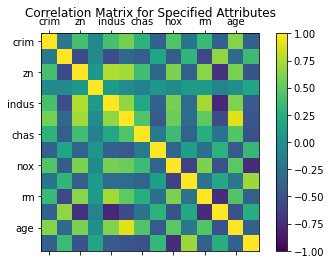

In [ ]:
def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(fig_no)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1) ## correlation go from -1 to 1
    fig.colorbar(cax)
    plt.show()

plot_corr_matrix(corrmatrix, df2.columns, 234) ##list of correlations, columns names from df2

## Lecture : OLS Linear Regression

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section2/Boston.csv"

In [ ]:
df1 = spark.read.csv(path,inferSchema=True,header=True)

In [ ]:
df1.show()

+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|  9|0.21124|12.5| 7.

drop column

In [ ]:
drop_list = ['_c0']
df2 = df1.select([col for col in df1.columns if col not in drop_list])

In [ ]:
df2.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [ ]:
from pyspark.mllib.stat import Statistics

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

In [ ]:
df2.columns

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [ ]:
Variables_corr = ['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']   ## variable X the predictors for medv(Y)

In [ ]:
vector_Col = "Predictors"
assembler = VectorAssembler(inputCols=Variables_corr,
                            outputCol=vector_Col) ## assemble the input

In [ ]:
output = assembler.transform(df2)

In [ ]:
output.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|          Predictors|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|[0.02985,0.0,2.18...|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5

In [ ]:
vector = output.select("Predictors","medv") ## X variables, target/response variable (Y)

In [ ]:
vector.show()

+--------------------+----+
|          Predictors|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [ ]:
## train test split
train_data,test_data = vector.randomSplit([0.7,0.3]) # 70 % training

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
regressor = LinearRegression(featuresCol = "Predictors",labelCol="medv")

In [ ]:
# fit model
lr_model = regressor.fit(train_data)

In [ ]:
training_summary = lr_model.summary

In [ ]:
training_summary.rootMeanSquaredError

4.62100450845813

In [ ]:
training_summary.r2

0.7430010979634543

In [ ]:
##predict on test dataset
lr_predictions = lr_model.transform(test_data)

In [ ]:
lr_predictions.show()

+--------------------+----+------------------+
|          Predictors|medv|        prediction|
+--------------------+----+------------------+
|[0.00632,18.0,2.3...|24.0| 29.46944030052009|
|[0.0136,75.0,4.0,...|18.9|15.004088540110576|
|[0.01381,80.0,0.4...|50.0|  40.6360045286699|
|[0.01432,100.0,1....|31.6| 32.74428299864058|
|[0.01778,95.0,1.4...|32.9|30.488582997767907|
|[0.01951,17.5,1.3...|33.0| 23.20396601203201|
|[0.01965,80.0,1.7...|20.1|19.590461461617622|
|[0.02177,82.5,2.0...|42.3| 36.99808358298173|
|[0.02543,55.0,3.7...|23.9| 27.41443244110561|
|[0.02731,0.0,7.07...|21.6| 24.69474584967694|
|[0.0315,95.0,1.47...|34.9|29.882221369436103|
|[0.0351,95.0,2.68...|48.5| 41.80492391128045|
|[0.03537,34.0,6.0...|22.0|28.752912851710633|
|[0.03548,80.0,3.6...|20.9|21.271676454091896|
|[0.03551,25.0,4.8...|22.9| 24.51047246814324|
|[0.03584,80.0,3.3...|23.5| 29.89745447075472|
|[0.03659,25.0,4.8...|24.8| 25.49794026154885|
|[0.03768,80.0,1.5...|34.6|  34.6825773418019|
|[0.04297,52.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator


In [ ]:
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.722262


In [ ]:
test_result = lr_model.evaluate(test_data)

In [ ]:
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4.88631


In [ ]:
test_result.r2

0.722261790658095

## Lecture : ElastincNet Regression

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section2/Boston.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show(6)

+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 6 rows



drop column

In [ ]:
drop_list = ['_c0'] ##variables to be dropped

df2=df1.select([column for column in df1.columns if column not in drop_list]) ##df without _c0

In [ ]:
df2.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
from pyspark.mllib.stat import Statistics



In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
Variables_corr= ['crim','zn',
'indus','chas','nox','tax','ptratio','black','lstat',
'rm','age','dis','rad'] ### the variables/predictors I need for linear regression
### medv--> response variable Y



In [ ]:
vector_col = "Predictors"
assembler = VectorAssembler(inputCols=Variables_corr, 
                            outputCol=vector_col) ##assemble the inputs and outputs


In [ ]:
output = assembler.transform(df2)


In [ ]:
vector=output.select("Predictors","medv") ## X variables, target/response variable (Y)

In [ ]:
vector.show()

+--------------------+----+
|          Predictors|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [ ]:
###split data into training and testing
train_data,test_data=vector.randomSplit([0.7,0.3]) ##70% for training

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
regressor=LinearRegression(featuresCol="Predictors",labelCol="medv",predictionCol="predmedv",
                           maxIter=20,regParam=0.3,elasticNetParam=0.8,standardization=False)

In [ ]:
##training on training dataset
lr_model = regressor.fit(train_data) ##.fit 

In [ ]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.814739
r2: 0.684282


In [ ]:
##predict on test dataset
lr_predictions = lr_model.transform(test_data)

In [ ]:
lr_predictions.show()

+--------------------+----+------------------+
|          Predictors|medv|          predmedv|
+--------------------+----+------------------+
|[0.01311,90.0,1.2...|35.4| 30.68852895432692|
|[0.01381,80.0,0.4...|50.0|37.813530040933266|
|[0.01432,100.0,1....|31.6| 33.31483062233968|
|[0.01501,90.0,1.2...|50.0|38.176625155432646|
|[0.01965,80.0,1.7...|20.1| 20.79311264648132|
|[0.02009,95.0,2.6...|50.0|39.156335528229846|
|[0.02498,0.0,1.89...|16.5|23.938343613488108|
|[0.02729,0.0,7.07...|34.7|29.477188155633172|
|[0.02731,0.0,7.07...|21.6|25.033829943609252|
|[0.02763,75.0,2.9...|30.8|31.021244481831662|
|[0.02899,40.0,1.2...|26.6|23.754633926923102|
|[0.03237,0.0,2.18...|33.4|28.997715934423773|
|[0.03445,82.5,2.0...|24.1|29.448251740767354|
|[0.03466,35.0,6.0...|19.4| 23.74756519296855|
|[0.03502,80.0,4.9...|28.5| 32.22547169843806|
|[0.0351,95.0,2.68...|48.5| 38.24201452429597|
|[0.03548,80.0,3.6...|20.9| 22.96728481258135|
|[0.03615,80.0,4.9...|27.9|30.789873258206242|
|[0.03871,52.

In [ ]:
predandlabels=lr_predictions.select("predmedv","medv")## predicted value column, actual value

In [ ]:
predandlabels.show()

+------------------+----+
|          predmedv|medv|
+------------------+----+
| 30.68852895432692|35.4|
|37.813530040933266|50.0|
| 33.31483062233968|31.6|
|38.176625155432646|50.0|
| 20.79311264648132|20.1|
|39.156335528229846|50.0|
|23.938343613488108|16.5|
|29.477188155633172|34.7|
|25.033829943609252|21.6|
|31.021244481831662|30.8|
|23.754633926923102|26.6|
|28.997715934423773|33.4|
|29.448251740767354|24.1|
| 23.74756519296855|19.4|
| 32.22547169843806|28.5|
| 38.24201452429597|48.5|
| 22.96728481258135|20.9|
|30.789873258206242|27.9|
| 26.83976313146597|23.2|
| 27.58580642781053|22.0|
+------------------+----+
only showing top 20 rows



In [ ]:
test_result = lr_model.evaluate(test_data)

In [ ]:
print("R Squared (R2) on test data = %g" % test_result.r2)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

R Squared (R2) on test data = 0.718534
Root Mean Squared Error (RMSE) on test data = 5.45352


## Lecture : Logistic Regression

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section4/cancer_tumor.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show(6)

+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---------+-----------+------------+--------------+---------+-----

In [ ]:
from pyspark.sql import functions as fn

In [ ]:
df2=df1.withColumn("diagnosis", fn.when(fn.col("diagnosis") == 'M' , 1).otherwise(0))

In [ ]:
df2.show()

+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---------+-----------+------------+--------------+---------+-----

In [ ]:
print((df2.count(), len(df2.columns)))

(569, 31)


In [ ]:
print(df2.toPandas().shape)

(569, 31)


In [ ]:
df2.groupBy('diagnosis').count().show()

+---------+-----+
|diagnosis|count|
+---------+-----+
|        1|  212|
|        0|  357|
+---------+-----+



In [ ]:
from pyspark.mllib.stat import Statistics
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
Pred_corr= ['radius_mean','texture_mean',
'area_mean','perimeter_mean','compactness_mean','radius_se','area_se','perimeter_se','radius_worst',
'texture_worst','area_worst','concavity_worst','symmetry_worst'] ### the variables/predictors I need for linear regression
### medv--> response variable Y



In [ ]:
vector_col = "Predictors"
assembler = VectorAssembler(inputCols=Pred_corr, 
                            outputCol=vector_col) ##assemble the inputs and outputs


In [ ]:
output = assembler.transform(df2)


In [ ]:
vector=output.select("Predictors","diagnosis") ## X variables, target/response variable (Y)

In [ ]:
vector.show()

+--------------------+---------+
|          Predictors|diagnosis|
+--------------------+---------+
|[17.99,10.38,1001...|        1|
|[20.57,17.77,1326...|        1|
|[19.69,21.25,1203...|        1|
|[11.42,20.38,386....|        1|
|[20.29,14.34,1297...|        1|
|[12.45,15.7,477.1...|        1|
|[18.25,19.98,1040...|        1|
|[13.71,20.83,577....|        1|
|[13.0,21.82,519.8...|        1|
|[12.46,24.04,475....|        1|
|[16.02,23.24,797....|        1|
|[15.78,17.89,781....|        1|
|[19.17,24.8,1123....|        1|
|[15.85,23.95,782....|        1|
|[13.73,22.61,578....|        1|
|[14.54,27.54,658....|        1|
|[14.68,20.13,684....|        1|
|[16.13,20.68,798....|        1|
|[19.81,22.15,1260...|        1|
|[13.54,14.36,566....|        0|
+--------------------+---------+
only showing top 20 rows



In [ ]:
###split data into training and testing
train_data,test_data=vector.randomSplit([0.7,0.3]) ##70% for training

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
regressor=LogisticRegression(featuresCol="Predictors",labelCol="diagnosis",maxIter=100)

In [ ]:
##fit on training dataset
lr_model = regressor.fit(train_data) ##.fit 

In [ ]:
import matplotlib.pyplot as plt

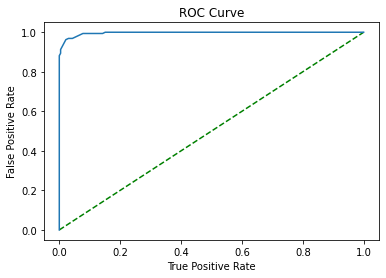

TrainSet areaUnderROC: 0.9966594827586207


In [ ]:
lr_model_summary = lr_model.summary
roc = lr_model_summary.roc.toPandas()

plt.plot([0, 1], [0, 1], 'g--')
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')

plt.title('ROC Curve')
plt.show()
print('TrainSet areaUnderROC: ' + str(lr_model_summary.areaUnderROC))

In [ ]:
roc

,FPR,TPR
0,0.000000,0.00000
1,0.000000,0.10625
2,0.000000,0.12500
3,0.000000,0.15000
4,0.000000,0.16875
...,...,...
123,0.965517,1.00000
124,0.978448,1.00000
125,0.991379,1.00000
126,1.000000,1.00000


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [ ]:
lr_model_test = lr_model.transform(test_data) ##predict

In [ ]:
lr_model_test.show()

+--------------------+---------+--------------------+--------------------+----------+
|          Predictors|diagnosis|       rawPrediction|         probability|prediction|
+--------------------+---------+--------------------+--------------------+----------+
|[8.196,16.84,201....|        0|[16.2473229817367...|[0.99999991212259...|       0.0|
|[8.734,16.84,234....|        0|[14.5793856465653...|[0.99999953414253...|       0.0|
|[8.878,15.49,241....|        0|[16.0702689223530...|[0.99999989510112...|       0.0|
|[9.0,14.4,246.3,5...|        0|[16.8422245594659...|[0.99999995152533...|       0.0|
|[9.423,27.88,271....|        0|[9.74591254045860...|[0.99994146999751...|       0.0|
|[9.436,18.32,278....|        0|[9.46819827504752...|[0.99992273546793...|       0.0|
|[9.504,12.44,273....|        0|[18.0019122660756...|[0.99999998479911...|       0.0|
|[9.667,18.49,289....|        0|[9.89737653570108...|[0.99994969604425...|       0.0|
|[9.731,15.34,300....|        0|[4.79933749179820...|[

In [ ]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='diagnosis')
print('Test Area Under ROC', evaluator.evaluate(lr_model_test))

Test Area Under ROC 0.9898461538461536


## Lecture : Dealing with Strings(Categorical Column)

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section3/Copy of dl_data.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show()

+-------------------+---------------------+-----------------+-------------------------------------+-------------------------------+-----------------------+------------------------------+-------------------------------+-------------------------+-------------------------+-------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------------+
|Visit_Number_Bucket|Page_Views_Normalized|Orders_Normalized|Internal_Search_Successful_Normalized|Internal_Search_Null_Normalized|Email_Signup_Normalized|Total_Seconds_Spent_Normalized|Store_Locator_Search_Normalized|Mapped_Last_Touch_Channel|Mapped_Mobile_Device_Type|Mapped_Browser_Type|Mapped_Entry_Pages|Mapped_Site_Section|Mapped_Promo_Code|Maped_Product_Name|Mapped_Search_Term|Mapped_Product_Collection|
+-------------------+---------------------+-----------------+-------------------------------------+-------------------------------+-----------------------+---------------------

In [ ]:
data = df1.withColumnRenamed('Orders_Normalized', 'label') #rename columns: original name, new name 

In [ ]:
data.show(4)

+-------------------+---------------------+-----+-------------------------------------+-------------------------------+-----------------------+------------------------------+-------------------------------+-------------------------+-------------------------+-------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------------+
|Visit_Number_Bucket|Page_Views_Normalized|label|Internal_Search_Successful_Normalized|Internal_Search_Null_Normalized|Email_Signup_Normalized|Total_Seconds_Spent_Normalized|Store_Locator_Search_Normalized|Mapped_Last_Touch_Channel|Mapped_Mobile_Device_Type|Mapped_Browser_Type|Mapped_Entry_Pages|Mapped_Site_Section|Mapped_Promo_Code|Maped_Product_Name|Mapped_Search_Term|Mapped_Product_Collection|
+-------------------+---------------------+-----+-------------------------------------+-------------------------------+-----------------------+------------------------------+--------------------------

In [ ]:
from pyspark.ml.feature import OneHotEncoder, VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf, StringType
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import MultilayerPerceptronClassifier

In [ ]:
categorical_columns = [item[0] for item in data.dtypes if item[1].startswith(
    'string')]
numeric_columns = [item[0] for item in data.dtypes if item[1].startswith(
   'double')]
indexers = [StringIndexer(inputCol=column, outputCol='{0}_index'.format(
    column)) for column in categorical_columns]

In [ ]:
featuresCreator = VectorAssembler(
    inputCols=[indexer.getOutputCol() for indexer in indexers] + numeric_columns,
    outputCol='features')

## Lecture: Multi Class  Random Forest Model

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section5/glassClass.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show()

+-------+-----+----+----+-----+----+----+---+----+----+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|Type|
+-------+-----+----+----+-----+----+----+---+----+----+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|   1|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|   1|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|   1|
|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|   1|
|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|   1|
|1.51571|12.72|3.46|1.56| 73.2|0.67|8.09|0.0|0.24|   1|
|1.51763| 12.8|3.66|1.27|73.01| 0.6|8.56|0.0| 0.0|   1|
|1.51589|12.88|3.43| 1.4|73.28|0.69|8.05|0.0|0.24|   1|
|1.51748|12.86|3.56|1.27|73.21|0.54|8.38|0.0|0.17|   1|
|1.51763|12.61|3.59|1.31|73.29|0.58| 8.5|0.0| 0.

In [ ]:
from pyspark.mllib.stat import Statistics



In [ ]:

from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
Pred_corr= ['RI','Na',
'Mg','Al','Si','K','Ca','Ba','Fe'] ### the variables/predictors I need for rf
### Type--> response variable Y



In [ ]:
vector_col = "Predictors"
assembler = VectorAssembler(inputCols=Pred_corr, 
                            outputCol=vector_col) ##assemble the inputs and outputs


In [ ]:

output = assembler.transform(df1)


In [ ]:
output.show()

+-------+-----+----+----+-----+----+----+---+----+----+--------------------+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|Type|          Predictors|
+-------+-----+----+----+-----+----+----+---+----+----+--------------------+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|   1|[1.52101,13.64,4....|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|[1.51761,13.89,3....|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|[1.51618,13.53,3....|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|[1.51766,13.21,3....|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|[1.51742,13.27,3....|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|[1.51596,12.79,3....|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|   1|[1.51743,13.3,3.6...|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|   1|[1.51756,13.15,3....|
|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|   1|[1.51918,14.04,3....|
|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|   1|[1.51755,13.0,3.6...|

In [ ]:
vector=output.select("Predictors","Type") ## X variables, target/response variable (Y)

In [ ]:
vector.show()

+--------------------+----+
|          Predictors|Type|
+--------------------+----+
|[1.52101,13.64,4....|   1|
|[1.51761,13.89,3....|   1|
|[1.51618,13.53,3....|   1|
|[1.51766,13.21,3....|   1|
|[1.51742,13.27,3....|   1|
|[1.51596,12.79,3....|   1|
|[1.51743,13.3,3.6...|   1|
|[1.51756,13.15,3....|   1|
|[1.51918,14.04,3....|   1|
|[1.51755,13.0,3.6...|   1|
|[1.51571,12.72,3....|   1|
|[1.51763,12.8,3.6...|   1|
|[1.51589,12.88,3....|   1|
|[1.51748,12.86,3....|   1|
|[1.51763,12.61,3....|   1|
|[1.51761,12.81,3....|   1|
|[1.51784,12.68,3....|   1|
|[1.52196,14.36,3....|   1|
|[1.51911,13.9,3.7...|   1|
|[1.51735,13.02,3....|   1|
+--------------------+----+
only showing top 20 rows



In [ ]:
###split data into training and testing
train_data,test_data=vector.randomSplit([0.7,0.3]) ##70% for training

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
regressor=RandomForestClassifier(featuresCol="Predictors",labelCol="Type") ## x,y 

In [ ]:
##predict on training dataset
rf_model = regressor.fit(train_data) ##.fit 

In [ ]:
## make predictions
predictions = rf_model.transform(test_data) ## implement the rf model on testing data using 'transform'
rfPredictions = predictions.select("Type", "prediction", "probability")
rfPredictions.show(10)

+----+----------+--------------------+
|Type|prediction|         probability|
+----+----------+--------------------+
|   7|       7.0|[0.0,0.0,0.0,0.0,...|
|   7|       7.0|[0.0,0.0,0.0,0.0,...|
|   7|       7.0|[0.0,0.0,0.0,0.0,...|
|   1|       2.0|[0.0,0.0773067065...|
|   2|       2.0|[0.0,0.3262001220...|
|   1|       2.0|[0.0,0.0817421904...|
|   2|       2.0|[0.0,0.0233593381...|
|   2|       2.0|[0.0,0.1006128412...|
|   1|       2.0|[0.0,0.1273067065...|
|   3|       2.0|[0.0,0.2345405427...|
+----+----------+--------------------+
only showing top 10 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# Evaluating accuracy of our model

evaluator = MulticlassClassificationEvaluator() \
                      .setLabelCol("Type") \
                      .setPredictionCol("prediction") \
                      .setMetricName("accuracy")

accuracy = evaluator.evaluate(predictions)

print("Test Error : {}".format(100*(1.0 - accuracy)))
print("Accuracy of the model : {}".format(100*accuracy))

Test Error : 32.35294117647059
Accuracy of the model : 67.64705882352942


## Lecture : Random Forest Regression

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section2/Boston.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show(8)

+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172|96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
+---+-------+----+-----+----+---

Drop a col

In [ ]:
drop_list = ['_c0'] ##variables to be dropped

df2=df1.select([column for column in df1.columns if column not in drop_list]) ##df without _c0

In [ ]:
df2.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
#from pyspark.mllib.stat import Statistics
from pyspark.ml.regression import RandomForestRegressor



In [ ]:

from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
Variables_corr= ['crim','zn',
'indus','chas','nox','tax','ptratio','black','lstat',
'rm','age','dis','rad'] ### the variables/predictors I need for rf regression
### medv--> response variable Y



In [ ]:
vector_col = "Predictors"
assembler = VectorAssembler(inputCols=Variables_corr, 
                            outputCol=vector_col) ##assemble the inputs and outputs


In [ ]:
output = assembler.transform(df2)


In [ ]:
vector=output.select("Predictors","medv") ## X variables, target/response variable (Y)

In [ ]:
vector.show()

+--------------------+----+
|          Predictors|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [ ]:
###split data into training and testing
train_data,test_data=vector.randomSplit([0.7,0.3]) ##70% for training

In [ ]:
regressor=RandomForestRegressor(featuresCol="Predictors",labelCol="medv",predictionCol="Prediction Price")

In [ ]:
##train on training dataset
rf_model = regressor.fit(train_data) ##.fit 

In [ ]:
predictions = rf_model.transform(test_data)# .transform on 30% testing datas

In [ ]:
predictions.show()

+--------------------+----+------------------+
|          Predictors|medv|  Prediction Price|
+--------------------+----+------------------+
|[0.01301,35.0,1.5...|32.7|32.289242710888054|
|[0.0136,75.0,4.0,...|18.9|18.712091231267628|
|[0.01439,60.0,2.9...|29.1| 28.31726929345578|
|[0.01709,90.0,2.0...|30.1|29.592230540521275|
|[0.01965,80.0,1.7...|20.1|21.704858074773867|
|[0.02177,82.5,2.0...|42.3| 43.27663388931744|
|[0.02729,0.0,7.07...|34.7| 33.89863856925204|
|[0.02763,75.0,2.9...|30.8|27.777862855122873|
|[0.02875,28.0,15....|25.0| 24.42590741756698|
|[0.02899,40.0,1.2...|26.6|27.899491100851805|
|[0.03113,0.0,4.39...|17.5| 20.39376522759522|
|[0.03427,0.0,5.19...|19.5| 21.79312040092075|
|[0.03445,82.5,2.0...|24.1| 25.38257802571773|
|[0.03466,35.0,6.0...|19.4|25.139114534999937|
|[0.03548,80.0,3.6...|20.9|23.300563326623244|
|[0.03768,80.0,1.5...|34.6|31.982691329452955|
|[0.03961,0.0,5.19...|21.1|21.683053581573535|
|[0.04113,25.0,4.8...|28.0| 25.90989160221838|
|[0.04294,28.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
evaluator = RegressionEvaluator(labelCol="medv",predictionCol="Prediction Price", 
                                metricName="rmse")

In [ ]:
rmse = evaluator.evaluate(predictions)
print(rmse)

3.674570047680515


In [ ]:
evaluator = RegressionEvaluator(labelCol="medv",predictionCol="Prediction Price", 
                                metricName="r2")

In [ ]:
r2 = evaluator.evaluate(predictions)
print(r2)

0.8427953255986207


## Lecture : Random Forest Regression With Pipeline Implemenation

In [ ]:
# Import libraries

from pyspark.sql import SparkSession

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator


In [ ]:
# Initializing Spark Session Object
spark = SparkSession.builder.master('local').getOrCreate()

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section2/Boston.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show(8)

+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172|96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
+---+-------+----+-----+----+---

drop a col

In [ ]:
drop_list = ['_c0'] ##variables to be dropped

df2=df1.select([column for column in df1.columns if column not in drop_list]) ##df without _c0

In [ ]:
df2.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
###split data into training and testing
train_data,test_data=df2.randomSplit([0.7,0.3]) ##70% for training

In [ ]:
Variables_corr= ['crim','zn',
'indus','chas','nox','tax','ptratio','black','lstat',
'rm','age','dis','rad'] ### the variables/predictors I need for rf regression
### medv--> response variable Y

In [ ]:
# Initializing Vector Assembler to convert columns to vector
vector_col = "Predictors"
assembler = VectorAssembler(inputCols=Variables_corr, 
                            outputCol=vector_col) ##assemble the inputs and outputs

In [ ]:
# Initializing Random Forest Model
regressor=RandomForestRegressor(featuresCol="Predictors",labelCol="medv",predictionCol="Prediction Price")

In [ ]:
# Initializing Pipeline to execute all steps at once
pipeline = Pipeline(stages=[assembler, regressor])

In [ ]:
# Creating a Parameter Grid with all the parameters 
paramGrid = ParamGridBuilder() \
                  .addGrid(regressor.maxDepth, [3, 5, 10, 15]) \
                  .addGrid(regressor.numTrees, [3, 5, 10, 15]) \
                  .build()

In [ ]:
# Regressor evaluator to evaluate model
evaluator = RegressionEvaluator(labelCol="medv", predictionCol="Prediction Price")

In [ ]:
# Initialiazing cross validator model with paramGrid to create parameterized tuned model
crossValidator = CrossValidator(estimator=pipeline,
                             estimatorParamMaps=paramGrid,
                             evaluator=evaluator,
                             numFolds=10)  

In [ ]:
# Training cross validator model
tuned_model = crossValidator.fit(train_data)

In [ ]:
# Getting predictions
predictions = tuned_model.transform(test_data)

In [ ]:
predictions.show()

+-------+-----+-----+----+-----+-----+----+-------+---+---+-------+------+-----+----+--------------------+------------------+
|   crim|   zn|indus|chas|  nox|   rm| age|    dis|rad|tax|ptratio| black|lstat|medv|          Predictors|  Prediction Price|
+-------+-----+-----+----+-----+-----+----+-------+---+---+-------+------+-----+----+--------------------+------------------+
|0.01096| 55.0| 2.25|   0|0.389|6.453|31.9| 7.3073|  1|300|   15.3|394.72| 8.23|22.0|[0.01096,55.0,2.2...|             25.66|
|0.01301| 35.0| 1.52|   0|0.442|7.241|49.3| 7.0379|  1|284|   15.5|394.74| 5.49|32.7|[0.01301,35.0,1.5...|             32.82|
| 0.0136| 75.0|  4.0|   0| 0.41|5.888|47.6| 7.3197|  3|469|   21.1| 396.9| 14.8|18.9|[0.0136,75.0,4.0,...|18.153333333333332|
|0.01432|100.0| 1.32|   0|0.411|6.816|40.5| 8.3248|  5|256|   15.1| 392.9| 3.95|31.6|[0.01432,100.0,1....|30.693333333333335|
|0.01501| 80.0| 2.01|   0|0.435|6.635|29.7|  8.344|  4|280|   17.0|390.94| 5.99|24.5|[0.01501,80.0,2.0...|25.244999999

In [ ]:
rmse = evaluator.evaluate(predictions)


In [ ]:
print(rmse)

3.4676833672459066


## Lecture : K Means Clustering Model

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section5/glassClass.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show()

+-------+-----+----+----+-----+----+----+---+----+----+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|Type|
+-------+-----+----+----+-----+----+----+---+----+----+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|   1|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|   1|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|   1|
|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|   1|
|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|   1|
|1.51571|12.72|3.46|1.56| 73.2|0.67|8.09|0.0|0.24|   1|
|1.51763| 12.8|3.66|1.27|73.01| 0.6|8.56|0.0| 0.0|   1|
|1.51589|12.88|3.43| 1.4|73.28|0.69|8.05|0.0|0.24|   1|
|1.51748|12.86|3.56|1.27|73.21|0.54|8.38|0.0|0.17|   1|
|1.51763|12.61|3.59|1.31|73.29|0.58| 8.5|0.0| 0.

In [ ]:
df1.groupBy('Type').count().show()

+----+-----+
|Type|count|
+----+-----+
|   1|   70|
|   6|    9|
|   3|   17|
|   5|   13|
|   7|   29|
|   2|   76|
+----+-----+



In [ ]:
from pyspark.mllib.stat import Statistics



In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
Pred_corr= ['RI','Na',
'Mg','Al','Si','K','Ca','Ba','Fe'] ### the variables/predictors I need 




In [ ]:
from pyspark.ml.clustering import KMeans



In [ ]:
vecAssembler = VectorAssembler(inputCols=Pred_corr, outputCol="features")


In [ ]:
df_kmeans = vecAssembler.transform(df1).select('features')
df_kmeans.show()

+--------------------+
|            features|
+--------------------+
|[1.52101,13.64,4....|
|[1.51761,13.89,3....|
|[1.51618,13.53,3....|
|[1.51766,13.21,3....|
|[1.51742,13.27,3....|
|[1.51596,12.79,3....|
|[1.51743,13.3,3.6...|
|[1.51756,13.15,3....|
|[1.51918,14.04,3....|
|[1.51755,13.0,3.6...|
|[1.51571,12.72,3....|
|[1.51763,12.8,3.6...|
|[1.51589,12.88,3....|
|[1.51748,12.86,3....|
|[1.51763,12.61,3....|
|[1.51761,12.81,3....|
|[1.51784,12.68,3....|
|[1.52196,14.36,3....|
|[1.51911,13.9,3.7...|
|[1.51735,13.02,3....|
+--------------------+
only showing top 20 rows



In [ ]:
k = 7
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans) ## fit the k means
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[1.52174963e+00 1.37800000e+01 3.68074074e+00 8.75555556e-01
 7.17651852e+01 1.64074074e-01 9.57666667e+00 2.96296296e-02
 4.96296296e-02]
[1.51724928e+00 1.31253600e+01 3.50000000e+00 1.37704000e+00
 7.28180000e+01 5.77280000e-01 8.37256000e+00 1.46400000e-02
 6.49600000e-02]
[1.52214056e+00 1.28777778e+01 2.73888889e-01 1.32500000e+00
 7.28938889e+01 2.85555556e-01 1.21405556e+01 0.00000000e+00
 4.44444444e-02]
[1.51631923e+00 1.46003846e+01 9.69230769e-02 2.10615385e+00
 7.33938462e+01 1.74615385e-01 8.59038462e+00 9.57692308e-01
 1.50000000e-02]
[ 1.513185 13.01      0.        3.03     70.59      6.21      6.945
  0.        0.      ]
[ 1.51945857 14.00642857  2.15428571  1.83357143 71.85071429  0.49857143
  9.02785714  0.48428571  0.07357143]
[ 1.53259 11.515    0.       1.55    69.985    0.35    14.745    1.575
  0.26   ]


In [ ]:
predictions = model.transform(df_kmeans.select("features")) ## k meansis only fitted on feeaur

In [ ]:
predictions.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[1.52101,13.64,4....|         0|
|[1.51761,13.89,3....|         1|
|[1.51618,13.53,3....|         1|
|[1.51766,13.21,3....|         1|
|[1.51742,13.27,3....|         1|
|[1.51596,12.79,3....|         1|
|[1.51743,13.3,3.6...|         1|
|[1.51756,13.15,3....|         1|
|[1.51918,14.04,3....|         1|
|[1.51755,13.0,3.6...|         1|
|[1.51571,12.72,3....|         1|
|[1.51763,12.8,3.6...|         1|
|[1.51589,12.88,3....|         1|
|[1.51748,12.86,3....|         1|
|[1.51763,12.61,3....|         1|
|[1.51761,12.81,3....|         1|
|[1.51784,12.68,3....|         1|
|[1.52196,14.36,3....|         0|
|[1.51911,13.9,3.7...|         0|
|[1.51735,13.02,3....|         1|
+--------------------+----------+
only showing top 20 rows



In [ ]:
df1.show()

+-------+-----+----+----+-----+----+----+---+----+----+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|Type|
+-------+-----+----+----+-----+----+----+---+----+----+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|   1|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|   1|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|   1|
|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|   1|
|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|   1|
|1.51571|12.72|3.46|1.56| 73.2|0.67|8.09|0.0|0.24|   1|
|1.51763| 12.8|3.66|1.27|73.01| 0.6|8.56|0.0| 0.0|   1|
|1.51589|12.88|3.43| 1.4|73.28|0.69|8.05|0.0|0.24|   1|
|1.51748|12.86|3.56|1.27|73.21|0.54|8.38|0.0|0.17|   1|
|1.51763|12.61|3.59|1.31|73.29|0.58| 8.5|0.0| 0.

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.5924801229903857


## Lecture : ANN Binary

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section2/cancer_tumor.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show(5)

+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---------+-----------+------------+--------------+---------+-----

In [ ]:
df1 = df1.na.drop()#drop nas 

In [ ]:

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
Pred_corr= ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
             'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
             'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
             'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'] 
             
### the variables/predictors I need for ann-->30
### Type--> response variable Y

In [ ]:
vector_col = "features"
assembler = VectorAssembler(inputCols=Pred_corr, 
                            outputCol=vector_col, handleInvalid="skip") ##assemble the inputs and outputs


In [ ]:
output = assembler.transform(df1)


In [ ]:
from pyspark.ml.feature import StringIndexer

ix = StringIndexer(inputCol="diagnosis", outputCol="diagnosis_ix", handleInvalid="keep")

output = ix.fit(output).transform(output)##diagnosis_ix will store M and B as integers

In [ ]:
output.show()

+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+--------------------+------------+
|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|            features|diagnosis_ix

In [ ]:
vector=output.select("features","diagnosis_ix") ## X variables, target/response variable (Y)

In [ ]:
vector = vector.na.drop()

In [ ]:
###split data into training and testing
train_data,test_data=vector.randomSplit([0.7,0.3]) ##70% for training

In [ ]:
train_data.show(10, False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|features                                                                                                                                                                                                           |diagnosis_ix|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|[6.981,13.43,43.79,143.5,0.117,0.07568,0.0,0.0,0.193,0.07818,0.2241,1.508,1.553,9.833,0.01019,0.01084,0.0,0.0,0.02659,0.0041,7.93,19.54,50.41,185.2,0.1584,0.1202,0.0,0.0,0.2932,0.09382]                          |0.0         |
|[7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.0

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

In [ ]:
layers=[30,12,12,3] ## inputs, hidden nodes, ouput

In [ ]:
mlp = MultilayerPerceptronClassifier(layers = layers, seed = 1, featuresCol="features", labelCol='diagnosis_ix')

In [ ]:
model = mlp.fit(train_data)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
predictions = model.transform(test_data)

In [ ]:
predictions.show()

+--------------------+------------+--------------------+--------------------+----------+
|            features|diagnosis_ix|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|[7.691,25.44,48.3...|         0.0|[82.7484367902253...|[0.90926881977426...|       0.0|
|[7.729,25.49,47.9...|         0.0|[82.7484367902253...|[0.90926881977426...|       0.0|
|[8.196,16.84,51.7...|         0.0|[82.7484367902253...|[0.90926881977426...|       0.0|
|[8.219,20.7,53.27...|         0.0|[82.7484367902253...|[0.90926881977426...|       0.0|
|[8.618,11.79,54.3...|         0.0|[82.7484367902253...|[0.90926881977426...|       0.0|
|[8.671,14.45,54.4...|         0.0|[82.7484367902253...|[0.90926881977426...|       0.0|
|[9.173,13.86,59.2...|         0.0|[82.7484367902253...|[0.90926881977426...|       0.0|
|[9.268,12.87,61.4...|         0.0|[82.7484367902253...|[0.90926881977426...|       0.0|
|[9.295,13.9,59.96...

In [ ]:
# Evaluating accuracy of our model

evaluator = MulticlassClassificationEvaluator() \
                      .setLabelCol("diagnosis_ix") \
                      .setPredictionCol("prediction") \
                      .setMetricName("accuracy")

accuracy = evaluator.evaluate(predictions)

print("Test Error : {}".format(100*(1.0 - accuracy)))
print("Accuracy of the model : {}".format(100*accuracy))

Test Error : 10.63829787234043
Accuracy of the model : 89.36170212765957


## Lecure : ANN with a mixed(string,numeric) dataset

In [ ]:
path = "/content/drive/MyDrive/Pyspark_Google_Colab_Primer/section3/Copy of dl_data.csv"

In [ ]:
df1=spark.read.csv(path,inferSchema=True, header=True)

In [ ]:
df1.show(5)

+-------------------+---------------------+-----------------+-------------------------------------+-------------------------------+-----------------------+------------------------------+-------------------------------+-------------------------+-------------------------+-------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------------+
|Visit_Number_Bucket|Page_Views_Normalized|Orders_Normalized|Internal_Search_Successful_Normalized|Internal_Search_Null_Normalized|Email_Signup_Normalized|Total_Seconds_Spent_Normalized|Store_Locator_Search_Normalized|Mapped_Last_Touch_Channel|Mapped_Mobile_Device_Type|Mapped_Browser_Type|Mapped_Entry_Pages|Mapped_Site_Section|Mapped_Promo_Code|Maped_Product_Name|Mapped_Search_Term|Mapped_Product_Collection|
+-------------------+---------------------+-----------------+-------------------------------------+-------------------------------+-----------------------+---------------------

In [ ]:
data = df1.withColumnRenamed('Orders_Normalized', 'label') #rename columns

In [ ]:
from pyspark.ml.feature import OneHotEncoder, VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf, StringType
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import MultilayerPerceptronClassifier

In [ ]:
train, validation, test = data.randomSplit([0.7, 0.2, 0.1], 1234)

In [ ]:
categorical_columns = [item[0] for item in data.dtypes if item[1].startswith(
    'string')]
numeric_columns = [item[0] for item in data.dtypes if item[1].startswith(
    'double')]
indexers = [StringIndexer(inputCol=column, outputCol='{0}_index'.format(
    column)) for column in categorical_columns] ## read in the string columns

In [ ]:
featuresCreator = VectorAssembler(
    inputCols=[indexer.getOutputCol() for indexer in indexers] + numeric_columns,
    outputCol='features')
layers = [len(featuresCreator.getInputCols()), 4, 2, 2] ## no. of predictors, hidden nodes, response

In [ ]:
classifier = MultilayerPerceptronClassifier(labelCol='label',
                                            featuresCol='features',
                                            maxIter=100,
                                            layers=layers,
                                            blockSize=128,
                                            seed=1234)

In [ ]:
pipeline = Pipeline(stages=indexers + [featuresCreator, classifier])

In [ ]:
model = pipeline.fit(train)

In [ ]:
train_output_df = model.transform(train)
validation_output_df = model.transform(validation)
test_output_df = model.transform(test)

In [ ]:
train_predictionAndLabels = train_output_df.select('prediction', 'label')
validation_predictionAndLabels = validation_output_df.select('prediction', 'label')
test_predictionAndLabels = test_output_df.select('prediction', 'label')


In [ ]:
test_predictionAndLabels.show()

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|    0|
|       0.0|    0|
|       0.0|    0|
|       1.0|    0|
|       0.0|    0|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       0.0|    0|
|       0.0|    0|
+----------+-----+
only showing top 20 rows



In [ ]:
metrics = ['weightedPrecision', 'weightedRecall', 'accuracy']
for metric in metrics:
  evaluator = MulticlassClassificationEvaluator(metricName=metric)
  print('Train ' + metric + ' = ' + str(evaluator.evaluate(
      train_predictionAndLabels)))
  print('Validation ' + metric + ' = ' + str(evaluator.evaluate(
      validation_predictionAndLabels)))
  print('Test ' + metric + ' = ' + str(evaluator.evaluate(
      test_predictionAndLabels)))

Train weightedPrecision = 0.9718465803511076
Validation weightedPrecision = 0.9724700548433042
Test weightedPrecision = 0.9699435168283953
Train weightedRecall = 0.9713846931436014
Validation weightedRecall = 0.9719613447665714
Test weightedRecall = 0.969260065288357
Train accuracy = 0.9713846931436014
Validation accuracy = 0.9719613447665714
Test accuracy = 0.969260065288357
